# Homework Set 2

In [2]:
%pylab inline
import numpy as np
import pandas as pd
import fmt

Populating the interactive namespace from numpy and matplotlib


## Problem 1:

Prove the following properties for the matrix norm, where $A, B$ are matrices, $\boldsymbol u$ is a vector and $b$ is a scaler.
$\renewcommand{bs}{\boldsymbol}$
* $\Vert A ^{-1} \Vert = \max_{\bs u \ne 0} \frac{\Vert \bs u\Vert}{\Vert A \bs u \Vert} = \left(\min_{\bs u \ne 0} \frac{\Vert A \bs u \Vert}{\Vert \bs u \Vert}\right)^{-1}$
* $\Vert A \boldsymbol u \Vert  \le \Vert A\Vert \; \Vert \boldsymbol u\Vert $
* $\Vert b A\Vert  = \vert b\vert \; \Vert A\Vert $ 
* $\Vert A + B\Vert  \le \Vert A\Vert  + \Vert B\Vert $
* $\Vert AB\Vert  \le \Vert A\Vert \Vert B\Vert$

## A:

* $\Vert A ^{-1} \Vert = \max_{\bs u \ne 0} \frac{\Vert \bs u\Vert}{\Vert A \bs u \Vert} = \left(\min_{\bs u \ne 0} \frac{\Vert A \bs u \Vert}{\Vert \bs u \Vert}\right)^{-1}$

Based on definition, we know matrix norm is defined to be the largest amount the linear transformation can stretch a vector. Therefore, 
$$\Vert A\Vert  = \max_{\bs u \ne 0}\frac{\Vert A\bs u\Vert }{\Vert \bs u\Vert }$$

Substitute $A$ with $A ^{-1}$, we have 
$$\Vert A ^{-1}\Vert  = \max_{\bs u \ne 0}\frac{\Vert A ^{-1}\bs u\Vert }{\Vert \bs u\Vert }$$

We can multiply the RHS of the equation with $A$ on both top and bottom. Therefore,

$$\max_{\bs u \ne 0}\frac{\Vert A ^{-1}\bs u\Vert }{\Vert \bs u\Vert } = \max_{\bs u \ne 0}\frac{A \Vert A ^{-1}\bs u\Vert }{A \Vert \bs u\Vert } = \max_{\bs u \ne 0} \frac{\Vert \bs u\Vert}{\Vert A \bs u \Vert} = \left( \left( \max_{\bs u \ne 0} \frac{\Vert \bs u\Vert}{\Vert A \bs u \Vert}  \right) ^{-1} \right) ^{-1} = \left(\min_{\bs u \ne 0} \frac{\Vert A \bs u \Vert}{\Vert \bs u \Vert}\right)^{-1}$$

* $\Vert A \boldsymbol u \Vert  \le \Vert A\Vert \; \Vert \boldsymbol u\Vert $

Based on submultiplicativity rule, where $\Vert A B\Vert \le \Vert A\Vert \Vert B\Vert$ with $B = u$, any form of matrix norm by its definition need to satisfy this property. Since here we are talking about any matrix norm in general without a concrete definition of a given matrix norm (e.g. L1 L2 infinity), no concrete proof is needed. (A step by step proof can be provided if the matrix form is specified (e.g. L1 L2 infinity).)

* $\Vert b A\Vert  = \vert b\vert \; \Vert A\Vert $ 

Let $B = bA = \underbrace{ \frac{b}{ |b| } A + \dots + \frac{b}{ |b| }A }_\text{total |b| of terms}$

Then $\Vert B \Vert = \Vert bA \Vert = \underbrace{\Vert \frac{b}{ |b| } A \Vert + \dots + \Vert \frac{b}{ |b| } A \Vert }_\text{total |b| of terms} = \underbrace{\Vert A \Vert + \dots + \Vert  A \Vert }_\text{total |b| of terms} = \vert b\vert \; \Vert A\Vert $

* $\Vert A + B\Vert  \le \Vert A\Vert  + \Vert B\Vert $

Based on triangle inequality, where $\Vert A + B \Vert \le \Vert A \Vert + \Vert B \Vert$, any form of matrix norm by its definition need to satisfy this property. Since here we are talking about any matrix norm in general without a concrete definition of a given matrix norm (e.g. L1 L2 infinity), no concrete proof is needed. (A step by step proof can be provided if the matrix form is specified (e.g. L1 L2 infinity).)

* $\Vert AB\Vert  \le \Vert A\Vert \Vert B\Vert$

Based on submultiplicativity rule, where $\Vert A B\Vert \le \Vert A\Vert \Vert B\Vert$, any form of matrix norm by its definition need to satisfy this property. Since here we are talking about any matrix norm in general without a concrete definition of a given matrix norm (e.g. L1 L2 infinity), no concrete proof is needed. (A step by step proof can be provided if the matrix form is specified (e.g. L1 L2 infinity).)

## Problem 2



0. Derive the analytical expression of Cholesky decomposition of a 2 dimensional correlation matrix 
$\left(\begin{array} \\ 1 & \rho \\ \rho & 1 \end{array} \right)$, this result is worth memorizing.
1. Implement the recursive Cholesky decomposition algorithm discussed in the class in Python, with the following requirements:
 - use vector/matrix calculation whenever possible, but you obviously should not just call the buildin numpy/scipy functions for Cholesky decomposition 
 - detect and throw exception if the input matrix is not semi-positive definite
3. test your program against the version provided in scipy.linalg, and compare their performance

Hint: for #2, if you don't know what conditoin to catch, you can create a non-SPD matrix and observe how your program can fail. 

## A:

In [2]:
# Q .0
import sympy as sp
import numpy as np

p=sp.symbols('p');
#test=np.array([[a**2,a+b],[a*c+b,b/c]]);
M=sp.Matrix(((1,p),(p, 1)))
L=M.cholesky(hermitian=False)
L

Matrix([
[1,              0],
[p, sqrt(1 - p**2)]])

In [3]:
# Q .1
import numpy as np


def check_symmetric(A, rtol=1e-05, atol=1e-08):
    return np.allclose(A, A.T, rtol=rtol, atol=atol)

def is_pos_def(A):
    return np.all(np.linalg.eigvals(A) >= 0) and check_symmetric(A)


def cholesky_reduce(A):
    if not is_pos_def(A):
        raise Exception("The input matrix is not semi-positive definite")
    pivot = A[0, 0]
    b = np.mat(A[1:, 0])
    B = A[1:, 1:]
    return B - (b.T * b) / pivot


def recursive_cholesky(A):
    n = A.shape[0]
    if n == 1:
        return np.sqrt(A)
    b = np.mat(A[1:, 0])
    pivot = np.sqrt(A[0, 0])
    return np.bmat([
        [np.mat(pivot), np.zeros((1, n - 1))],
        [b.T / pivot, recursive_cholesky(cholesky_reduce(A))]
    ])


Now let's verify our recursive_cholesky with a similar matrix to q.0, with $p$ replaced by $i$. We can see the result matches our answer in q.0 from external library. We can also test to see if it raises exception upon non-positive definite

In [4]:
# test algorithm correctness
A = np.array([[1, 1j], [1j,1]])
recursive_cholesky(A)

matrix([[1.        +0.j, 0.        +0.j],
        [0.        +1.j, 1.41421356+0.j]])

In [5]:
# test algorithm raises exception upon non-positive definite
A = np.array([[1, 0], [1j,1]])
recursive_cholesky(A)

Exception: The input matrix is not semi-positive definite

In [ ]:
# Q .02
import time
import scipy
import scipy.linalg
import numpy as np

def random_symm_in_size(N):
    A = scipy.random.rand(N,N)
    B = np.dot(A,A.transpose())
    return (B+B.T)/2

testm1 = random_symm_in_size(1)
testm2 = random_symm_in_size(2)
testm3 = random_symm_in_size(3)

def compare_scipy(test_m):
    #print(test_m)
    my_l, scipy_l = None, None
    start_mine = time.time()
    try:
        my_l = recursive_cholesky(test_m)
    except Exception as e:
        print(e)
    end_mine = time.time()
    start_scipy = time.time()
    try:
        scipy_l = scipy.linalg.cholesky(test_m)
    except Exception as e:
        print(e)
    end_scipy = time.time()
    print(f"scipy: time_cost={end_scipy-start_scipy}\n"
        + f"mine : time_cost={end_mine-start_mine}")
    if my_l is not None and scipy_l is not None:
        print(f"Delta=\n{my_l - scipy_l}")
    else:
        if my_l is not None:
            print(f"my_l = {my_l}")
        else:
            print(f"scipy_l = {scipy_l}")
    
for m in [testm1, testm2, testm3]:
    compare_scipy(m)
    

In [ ]:
# test algorithm raises exception upon non-positive definite
A = np.array([[1, 0], [1j,1]])
recursive_cholesky(A)

As you can see in the comparison, the recursive algorithm can beat scipy algorithm when the matrix size is really small, but became slower when the matrix size is large. The recursive algorithm was able to raise exception upon non semi positive matrix.

## Problem 3

Take the portfolio and historical stock time series of the Dow Jones industrial average (DJIA) index:

In [23]:
%run lib/fmt.py
djiaurl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/djia.csv"
djia = pd.read_csv(djiaurl, index_col=[0])

displayDF(djia)

,Name,Sector,Weights
Ticker,,,
MMM,3M Co.,Diversified Industrials,0.0539
AXP,American Express Co.,Consumer Finance,0.0324
T,AT&T Inc.,Fixed Line Telecommunications,0.0134
BA,Boeing Co.,Aerospace/Defense Products & Services,0.0483
CAT,Caterpillar Inc.,Commercial Vehicles & Trucks,0.0373
CVX,Chevron Corp.,Integrated Oil & Gas,0.0438
CSCO,"Cisco Systems, Inc",Networking & Communication,0.0091
KO,Coca-Cola Co.,Soft Drinks,0.0168
DD,E.I. DuPont de Nemours & Co.,Commodity Chemicals,0.0263


<Figure size 432x288 with 0 Axes>

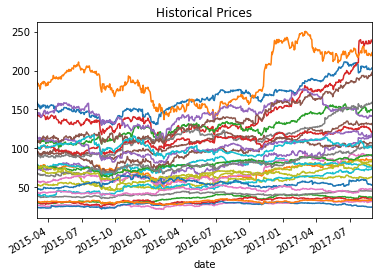

In [35]:
dataurl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/djiahist.csv"
histprice = pd.read_csv(dataurl, index_col=[0], parse_dates=True)
histprice = histprice.sort_index()
histprice.plot(legend=False, title='Historical Prices');

1. estimate the historical correlation and covariance matrix of the DJIA constituents' daily returns
2. estimate historical excess return of individual stocks (assume the historical risk free rate is 3%)
3. compute the optimal portfolio using the estimated historical excess return and covariance matrix, comment on whether the portfolio looks reasonable.
4. compute the implied return forecast from the actual DJIA portfolio, compare this to the historical estimate, comment on which may be a better forecast for the future returns.
5. compute the condition number of the covariance matrix, and comment on the numerical stability of the optimal portfolio. You can use the python function ```numpy.linalg.norm``` for matrix norm.
2. take the daily return time series, and split them into two segments: one only contains odd days' returns and the other only contains even days' returns. Then estimate every DJIA stock's annualized return and annualized vol from these two data segements, and compare their results. Please comment on which of the two metric, return or volatility, can be reliably estimated from historical data. 
6. [Extra credit] Please repeat the analysis using weekly returns and comment on whether the results are materially different
6. [Extra credit]: use numerical simulation to show that the optimal portfolio from #3 indeed has the largest Sharp ratio for the historical excess return and covariance; the best way to illustrate this is to introduce many random perturbations around the optimal portfolio. ```numpy.random``` is a random number generator package in Python.
7. [Extra credit, open question] comment on what practical implication you might infer from the results in #8.

Hints and requirements: 
* as discussed in class, returns are only meaningful in the relative sense, so please annualize all your results. You will lose credit without annualization.
* you may run into singular matrix when reverting the covariance matrix, try to find a work around if you do, (imagine what you would do if your future boss needs some results fast, and he doesn't understand what is a singular matrix that can't be inverted).
* on part 5, you can use array slice to split btw even and odd elements, see the following example:

In [36]:
whole = np.arange(1, 10)
print("whole = ", whole)
odd = whole[0::2]
even = whole[1::2]
print("even = ", even)
print("odd = ", odd)

whole =  [1 2 3 4 5 6 7 8 9]
even =  [2 4 6 8]
odd =  [1 3 5 7 9]


In [37]:
# 1.
    
logret = np.log(histprice).diff()[1:]

covar = logret.cov()*250
corr = logret.corr()

print("Covariance Matrix:")
displayDF(covar, 2, 2)

print("Correlation Matrix")
displayDF(corr, 2, 2)

Covariance Matrix:


,MMM,AXP,T,BA,CAT,CVX,CSCO,KO,DD,XOM,GE,GS,HD,INTC,IBM,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,DIS
MMM,0.024,0.011,0.0098,0.016,0.017,0.015,0.015,0.0091,0.015,0.014,0.016,0.017,0.013,0.015,0.014,0.012,0.017,0.01,0.013,0.015,0.012,0.01,0.01,0.013,0.015,0.011,0.011,0.015,0.0082,0.012
AXP,0.011,0.043,0.0055,0.017,0.02,0.013,0.014,0.0061,0.014,0.0095,0.016,0.026,0.013,0.015,0.016,0.0082,0.024,0.007,0.014,0.015,0.014,0.012,0.0069,0.011,0.014,0.016,0.0054,0.018,0.0062,0.012
T,0.0098,0.0055,0.022,0.012,0.012,0.013,0.011,0.0091,0.0078,0.011,0.012,0.01,0.01,0.011,0.012,0.0087,0.0098,0.007,0.01,0.011,0.0095,0.0074,0.0088,0.01,0.0092,0.008,0.018,0.01,0.0095,0.01
BA,0.016,0.017,0.012,0.047,0.025,0.021,0.018,0.011,0.02,0.017,0.02,0.026,0.016,0.019,0.019,0.012,0.025,0.012,0.017,0.019,0.017,0.013,0.012,0.015,0.02,0.016,0.012,0.019,0.011,0.018
CAT,0.017,0.02,0.012,0.025,0.061,0.031,0.02,0.0077,0.027,0.024,0.023,0.033,0.014,0.022,0.021,0.01,0.029,0.011,0.015,0.02,0.012,0.012,0.0095,0.014,0.02,0.012,0.012,0.017,0.0076,0.016
CVX,0.015,0.013,0.013,0.021,0.031,0.052,0.02,0.011,0.02,0.034,0.021,0.025,0.012,0.02,0.02,0.012,0.025,0.011,0.016,0.019,0.011,0.012,0.013,0.015,0.016,0.012,0.014,0.016,0.0089,0.015
CSCO,0.015,0.014,0.011,0.018,0.02,0.02,0.04,0.011,0.016,0.017,0.016,0.021,0.016,0.023,0.018,0.013,0.022,0.012,0.016,0.023,0.015,0.012,0.012,0.014,0.016,0.013,0.011,0.019,0.012,0.017
KO,0.0091,0.0061,0.0091,0.011,0.0077,0.011,0.011,0.017,0.0073,0.0094,0.0096,0.009,0.0084,0.01,0.0093,0.0072,0.0091,0.0095,0.0087,0.011,0.009,0.006,0.011,0.01,0.0088,0.0071,0.0097,0.011,0.0078,0.0085
DD,0.015,0.014,0.0078,0.02,0.027,0.02,0.016,0.0073,0.055,0.017,0.018,0.024,0.012,0.018,0.014,0.0082,0.023,0.011,0.013,0.017,0.011,0.011,0.0087,0.011,0.014,0.01,0.0084,0.015,0.0067,0.014
XOM,0.014,0.0095,0.011,0.017,0.024,0.034,0.017,0.0094,0.017,0.035,0.017,0.021,0.0098,0.016,0.017,0.012,0.021,0.0099,0.015,0.014,0.009,0.012,0.011,0.013,0.013,0.01,0.012,0.013,0.008,0.013


Correlation Matrix


,MMM,AXP,T,BA,CAT,CVX,CSCO,KO,DD,XOM,GE,GS,HD,INTC,IBM,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,DIS
MMM,1.0,0.34,0.42,0.49,0.43,0.43,0.47,0.46,0.4,0.46,0.55,0.46,0.46,0.45,0.48,0.56,0.51,0.4,0.42,0.44,0.34,0.38,0.47,0.54,0.58,0.36,0.45,0.48,0.28,0.43
AXP,0.34,1.0,0.18,0.37,0.39,0.28,0.35,0.23,0.29,0.24,0.41,0.53,0.36,0.33,0.41,0.29,0.54,0.21,0.34,0.32,0.29,0.33,0.24,0.32,0.4,0.39,0.16,0.43,0.16,0.33
T,0.42,0.18,1.0,0.38,0.32,0.39,0.36,0.47,0.22,0.4,0.42,0.3,0.38,0.33,0.41,0.42,0.3,0.29,0.35,0.33,0.28,0.28,0.42,0.42,0.36,0.27,0.75,0.34,0.34,0.37
BA,0.49,0.37,0.38,1.0,0.47,0.42,0.41,0.41,0.4,0.42,0.5,0.52,0.41,0.42,0.45,0.41,0.54,0.34,0.39,0.39,0.34,0.34,0.41,0.43,0.54,0.38,0.35,0.45,0.28,0.46
CAT,0.43,0.39,0.32,0.47,1.0,0.55,0.4,0.24,0.46,0.52,0.49,0.56,0.32,0.42,0.45,0.3,0.55,0.28,0.31,0.37,0.22,0.29,0.28,0.37,0.49,0.25,0.3,0.35,0.16,0.36
CVX,0.43,0.28,0.39,0.42,0.55,1.0,0.43,0.38,0.38,0.79,0.49,0.47,0.31,0.41,0.45,0.38,0.51,0.31,0.36,0.38,0.21,0.3,0.41,0.41,0.41,0.27,0.39,0.35,0.21,0.35
CSCO,0.47,0.35,0.36,0.41,0.4,0.43,1.0,0.43,0.33,0.44,0.43,0.44,0.44,0.54,0.48,0.46,0.51,0.39,0.4,0.53,0.33,0.35,0.43,0.44,0.49,0.32,0.35,0.49,0.32,0.48
KO,0.46,0.23,0.47,0.41,0.24,0.38,0.43,1.0,0.24,0.39,0.4,0.3,0.37,0.37,0.38,0.41,0.33,0.46,0.34,0.4,0.31,0.27,0.61,0.51,0.4,0.28,0.47,0.42,0.32,0.36
DD,0.4,0.29,0.22,0.4,0.46,0.38,0.33,0.24,1.0,0.39,0.4,0.42,0.3,0.36,0.31,0.26,0.45,0.29,0.28,0.33,0.2,0.27,0.26,0.3,0.36,0.22,0.22,0.33,0.15,0.33
XOM,0.46,0.24,0.4,0.42,0.52,0.79,0.44,0.39,0.39,1.0,0.49,0.47,0.3,0.41,0.48,0.45,0.52,0.33,0.42,0.34,0.21,0.37,0.44,0.42,0.4,0.28,0.4,0.35,0.23,0.38


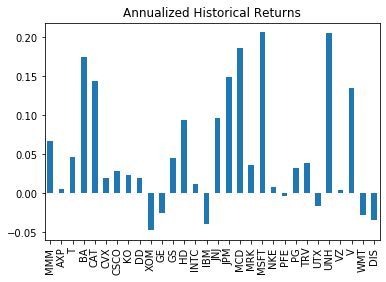

In [39]:
# 2. Historical excess return (annualized)

r0 = .03
u = logret.mean()*250 - r0

u.plot(kind='bar', title='Annualized Historical Returns');

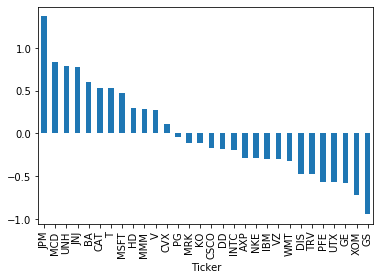

In [40]:
# 3: the Optimal portfolio, which looks quite extreme because it has very large long and short positions.
# This portfolio is not suitable in practice.
ci = np.linalg.inv(covar)

w = pd.Series(ci.dot(u)/u.T.dot(ci).dot(u), index=djia.index)
w.sort_values(ascending=False, inplace=False).plot(kind='bar');

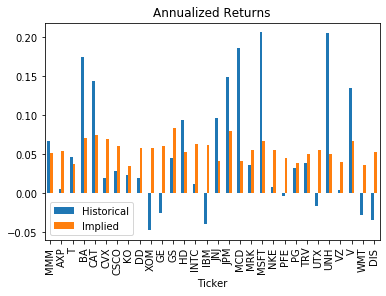

In [42]:
# 4: The implied forecast, it shows that the implied return 
# views are much more uniform than historical returns.
dj30w = djia['Weights']
f = np.dot(covar, dj30w)
# the implied returns are normalized and then annualized
f = f/dj30w.dot(f)*dj30w.dot(u)

ret = pd.DataFrame(np.array([u, f]).T, columns=['Historical', 'Implied'], index=djia.index)
ret.plot(kind='bar', title='Annualized Returns');

In [43]:
# 5: condition number of the covariance matrix, they are not large 
# thus the covariance matrix is well conditioned in our example. 
# Please remember that we lose  log10(𝑘)  digit of precision if  𝑘  
# is the condition number, since double precision numbers has 16 
# significant digits, losing 2-3 significant digits is not going to 
# cause problems.
print("Condition number of the covariance matrix is: ")

print({"L-%d" % n : np.linalg.norm(covar, n)*np.linalg.norm(ci, n) for n in [1, 2]})

Condition number of the covariance matrix is: 
{'L-1': 189.1276615548266, 'L-2': 85.81296690988525}


correlation of the two return estimates:  -0.2210957834044645
correlatin of the two vol estimates:  0.8734344276077021


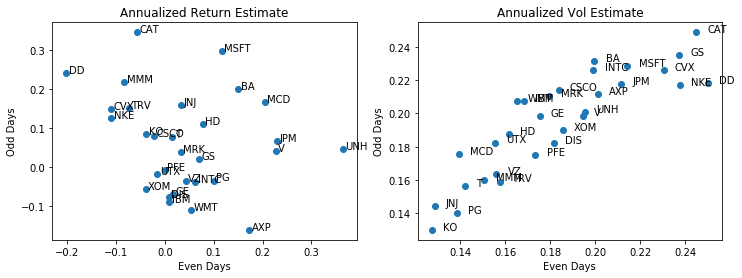

In [44]:
# 6: as shown below, the estimate of vol is similar,
# but the estimate of returns are widely different.
datLen = len(logret)
logret1 = logret.iloc[0::2, :]
logret2 = logret.iloc[1::2, :]

u1 = np.mean(logret1)*250 - r0
u2 = np.mean(logret2)*250 - r0

vol1 = np.std(logret1)*np.sqrt(250)
vol2 = np.std(logret2)*np.sqrt(250)

print("correlation of the two return estimates: ", np.corrcoef([u1, u2])[0, 1])
print("correlatin of the two vol estimates: ", np.corrcoef([vol1, vol2])[0, 1])

fig = figure(figsize=[12, 4])
ax1 = fig.add_subplot(121) 
plot(u1, u2, 'o')
xlabel('Even Days')
ylabel('Odd Days')
[ax1.annotate(s, (x+.005, y)) for s, x, y in zip(djia.index, u1, u2)]
title('Annualized Return Estimate')

ax2 = fig.add_subplot(122) 
plot(vol1, vol2, 'o')
xlabel('Even Days')
ylabel('Odd Days')
[ax2.annotate(s, (x+.005, y)) for s, x, y in zip(djia.index, vol1, vol2)]
title('Annualized Vol Estimate');

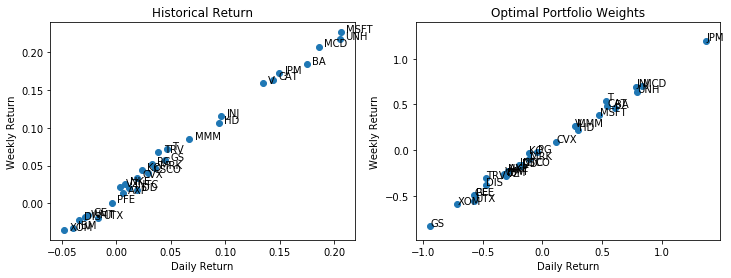

In [45]:
# 7: the following charts show that the annualized historical return 
# estimates and resulting optimal portfolios are somewhat different between 
# weekly returns and daily returns, but are largely consistent.

# pick up every friday
histprice_weekly = histprice[histprice.index.map(lambda x : x.weekday() == 4)]
weekly_ret = np.log(histprice_weekly).diff()[1:]

covarw = weekly_ret.cov()*52
corrw = weekly_ret.corr()

uw = np.mean(weekly_ret)*52 - r0
ciw = np.linalg.inv(covarw)

ww = pd.Series(ci.dot(uw)/u.T.dot(ciw).dot(uw), index=djia.index)

fig = figure(figsize=[12, 4])
ax1 = fig.add_subplot(121) 
plot(u, uw, 'o')
xlabel('Daily Return')
ylabel('Weekly Return')
[ax1.annotate(s, (x+.005, y)) for s, x, y in zip(djia.index, u, uw)]
title('Historical Return')

ax2 = fig.add_subplot(122) 
plot(w, ww, 'o')
xlabel('Daily Return')
ylabel('Weekly Return')
[ax2.annotate(s, (x+.005, y)) for s, x, y in zip(djia.index, w, ww)]
ylim(min(ww)-.15, max(ww)+.2)
title('Optimal Portfolio Weights');

Optimal Sharp ratio: 2.922302585543378
Maximum Sharp ratio from 4000 small perturabtion around the optimal portfoilo is 2.778586
Maximum Sharp ratio from 4000 random portfolio is 0.664124


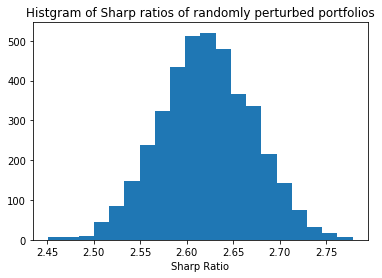

In [49]:
# 8: the simulation results are shown below. 
def sharp_ratio(f, v, w):
    return f.dot(w)/np.sqrt(w.dot(v).dot(w))

print("Optimal Sharp ratio:", sharp_ratio(u, covar, w))

# the follow lines runs simulations of many paths
n = 4000
simSRp = [sharp_ratio(u, covar, w + .1*v) for v in uniform(size=[n, len(w)])]
simSR = [sharp_ratio(u, covar, v) for v in uniform(size=[n, len(w)])]

print("Maximum Sharp ratio from %d small perturabtion around the optimal portfoilo is %f" % (n, max(simSRp)))
print("Maximum Sharp ratio from %d random portfolio is %f" % (n, max(simSR)))

hist(simSRp, 20);
xlabel('Sharp Ratio')
title('Histgram of Sharp ratios of randomly perturbed portfolios');

In [50]:
# 9: It is clear that simulation by random trials is not a good way to find 
# the optimal portfolio; in addition, we observe that even small 
# perturbations around the optimal portfolio lead to sizable degradation in 
# the Sharpe ratio, which means that we cannot reach the theoretical Sharpe 
# ratio in practice because of the errors in the return and covarance 
# estimates.